In [2]:
import tensorflow as tf
! pip install tensorflow_datasets
import tensorflow_datasets as tfds

2022-08-13 22:30:48.350660: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-08-13 22:30:48.350689: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.



[notice] A new release of pip available: 22.2.1 -> 22.2.2
[notice] To update, run: pip install --upgrade pip


/opt/python/3.10.4/lib/python3.10/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
import numpy as np
import matplotlib.pyplot as plt

In [4]:
tfds.list_builders()

2022-08-13 22:30:55.189415: W tensorflow/core/platform/cloud/google_auth_provider.cc:184] All attempts to get a Google authentication bearer token failed, returning an empty token. Retrieving token from files failed with "NOT_FOUND: Could not locate the credentials file.". Retrieving token from GCE failed with "FAILED_PRECONDITION: Error executing an HTTP request: libcurl code 6 meaning 'Couldn't resolve host name', error details: Could not resolve host: metadata".


['abstract_reasoning',
 'accentdb',
 'aeslc',
 'aflw2k3d',
 'ag_news_subset',
 'ai2_arc',
 'ai2_arc_with_ir',
 'amazon_us_reviews',
 'anli',
 'answer_equivalence',
 'arc',
 'asqa',
 'asset',
 'assin2',
 'bair_robot_pushing_small',
 'bccd',
 'beans',
 'bee_dataset',
 'beir',
 'big_patent',
 'bigearthnet',
 'billsum',
 'binarized_mnist',
 'binary_alpha_digits',
 'ble_wind_field',
 'blimp',
 'booksum',
 'bool_q',
 'c4',
 'caltech101',
 'caltech_birds2010',
 'caltech_birds2011',
 'cardiotox',
 'cars196',
 'cassava',
 'cats_vs_dogs',
 'celeb_a',
 'celeb_a_hq',
 'cfq',
 'cherry_blossoms',
 'chexpert',
 'cifar10',
 'cifar100',
 'cifar10_1',
 'cifar10_corrupted',
 'citrus_leaves',
 'cityscapes',
 'civil_comments',
 'clevr',
 'clic',
 'clinc_oos',
 'cmaterdb',
 'cnn_dailymail',
 'coco',
 'coco_captions',
 'coil100',
 'colorectal_histology',
 'colorectal_histology_large',
 'common_voice',
 'coqa',
 'cos_e',
 'cosmos_qa',
 'covid19',
 'covid19sum',
 'crema_d',
 'criteo',
 'cs_restaurants',
 'cura

In [5]:
(ds_train, ds_test), info = tfds.load(
    'cats_vs_dogs',
    split=['train[:70%]', 'train[70%:]'],
    with_info=True,
    as_supervised=True,
)

2022-08-13 22:30:56.286725: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2022-08-13 22:30:56.286750: W tensorflow/stream_executor/cuda/cuda_driver.cc:269] failed call to cuInit: UNKNOWN ERROR (303)
2022-08-13 22:30:56.286765: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (codespaces-538fda): /proc/driver/nvidia/version does not exist
2022-08-13 22:30:56.287014: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [11]:
print(info)

tfds.core.DatasetInfo(
    name='cats_vs_dogs',
    full_name='cats_vs_dogs/4.0.0',
    description="""
    A large set of images of cats and dogs. There are 1738 corrupted images that are dropped.
    """,
    homepage='https://www.microsoft.com/en-us/download/details.aspx?id=54765',
    data_path='~/tensorflow_datasets/cats_vs_dogs/4.0.0',
    file_format=tfrecord,
    download_size=786.67 MiB,
    dataset_size=689.64 MiB,
    features=FeaturesDict({
        'image': Image(shape=(None, None, 3), dtype=tf.uint8),
        'image/filename': Text(shape=(), dtype=tf.string),
        'label': ClassLabel(shape=(), dtype=tf.int64, num_classes=2),
    }),
    supervised_keys=('image', 'label'),
    disable_shuffling=False,
    splits={
        'train': <SplitInfo num_examples=23262, num_shards=8>,
    },
    citation="""@Inproceedings (Conference){asirra-a-captcha-that-exploits-interest-aligned-manual-image-categorization,
    author = {Elson, Jeremy and Douceur, John (JD) and Howell, Jon and

In [8]:
print("Training Set Size: %d" % ds_train.cardinality().numpy())
print("Test Set Size: %d" % ds_test.cardinality().numpy())

Training Set Size: 16283
Test Set Size: 6979


In [9]:
num_classes = info.features['label'].num_classes
print("Number of Classes: %d" % num_classes)



Number of Classes: 2


350
336
500
500
320


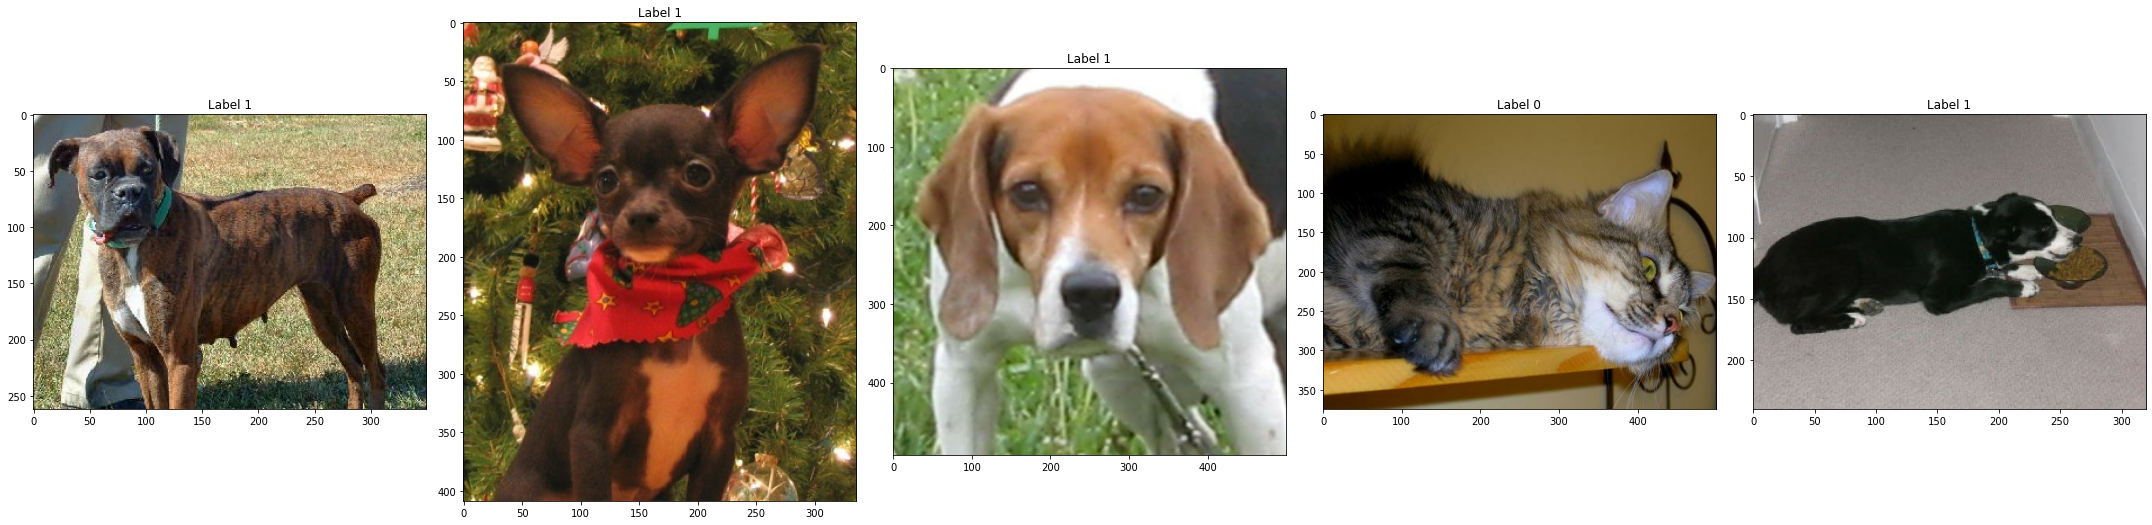

In [19]:
ctr = 0
plt.rcParams["figure.figsize"] = [30, 15]
plt.rcParams["figure.autolayout"] = True
  
for image, label in ds_train:
    image = image.numpy()
    print(image.shape[1])
    plt.subplot(1, 5, ctr+1)
    plt.title('Label {}'.format(label))
    plt.imshow(image, cmap=plt.cm.binary)
    ctr += 1
    if ctr == 5:
        break
  
plt.show()

In [15]:
for i, example in enumerate(ds_train.take(10)):
    shape = example[0].shape
    print("Image %d -> shape: (%d, %d) label: %d" %
          (i, shape[0], shape[1], example[1]))



Image 0 -> shape: (262, 350) label: 1
Image 1 -> shape: (409, 336) label: 1
Image 2 -> shape: (493, 500) label: 1
Image 3 -> shape: (375, 500) label: 0
Image 4 -> shape: (240, 320) label: 1
Image 5 -> shape: (100, 100) label: 1
Image 6 -> shape: (216, 182) label: 0
Image 7 -> shape: (375, 500) label: 0
Image 8 -> shape: (377, 500) label: 1
Image 9 -> shape: (500, 375) label: 1


In [23]:
min_shape = (1000,1000)
max_shape = (0,0)
add_shape = [0,0]
cnt = 0
for i, example in enumerate(ds_train):
    cnt = cnt +1
    shape = example[0].shape
    min_shape_area = min_shape[0]*min_shape[1]
    area = shape[0] * shape[1]
    if area < min_shape_area:
        min_shape = shape
    max_shape_area = max_shape[0]*max_shape[1]
    if area > max_shape_area:
        max_shape = shape
        
        
    add_shape[0] = add_shape[0] + shape[0]
    add_shape[1] = add_shape[1] + shape[1]
          
        
        
        
add_shape[0] = add_shape[0] / cnt
add_shape[1] = add_shape[1] / cnt
  
       
print("Image %d -> shape: (%d, %d) " %
        (i, min_shape[0], min_shape[1] ))
print("Image %d -> shape: (%d, %d) " %
        (i, max_shape[0], max_shape[1] ))
print(add_shape)

print(cnt)

Corrupt JPEG data: 99 extraneous bytes before marker 0xd9
Corrupt JPEG data: 396 extraneous bytes before marker 0xd9
Corrupt JPEG data: 65 extraneous bytes before marker 0xd9
Corrupt JPEG data: 2226 extraneous bytes before marker 0xd9
Corrupt JPEG data: 239 extraneous bytes before marker 0xd9


Image 16282 -> shape: (36, 60) 
Image 16282 -> shape: (500, 500) 
[365.3478474482589, 410.70957440275134]
16283


Corrupt JPEG data: 1153 extraneous bytes before marker 0xd9
Corrupt JPEG data: 228 extraneous bytes before marker 0xd9


In [ ]:
IMG_SIZE = 100
IMG_WIDTH = 100
IMG_HEIGHT = 100